<a href="https://colab.research.google.com/github/SarahSouzaPontes/cluster_agrupamento/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando bibliotecas necessarias a resolucao
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PERFIL DO CLIENTE PARA ENVIAR PROMOÇÕES E ATENDIMENTOS MAIS QUALIFICADO SOLICITADO POR UM SHOPPING -> GRUPOS DE CLIENTES PARA DECISÃO DE TAREFA DISTINTA ->DATAFRAME DAS COMPRAS NOS ÚLTIMSO 2 ANOS


In [2]:
#dataframe do colab
df = pd.read_csv('/content/drive/MyDrive/base_cluster.csv')
df
#GASTOS EM CADA MODALIDADE DE ITEM
#Ano de nascimento
#ID
# Total de gastos

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [5]:
#inserindo index - selecionar colunas apenas de gastos, inciia por Mnt
df2 = df.set_index('ID').filter(regex='Mnt', axis=1) #coluna axis = 1
df2
#PANDAS.DATAFRAME.FILTER -> https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [4]:
#perfil de compras
#iniciando a visualizar dataframe para visualizar var de ESCALAS iguais
df2.sum()
#PERFIL DO TIPO DE COISA (CATEGORIA) QUE ELE GASTA, SOMAR TODAS AS LINHAS %

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [6]:
df2.sum(axis=1)
#SOMA POR LINHA

ID
5524     1617
2174       27
4141      776
6182       53
5324      422
         ... 
10870    1341
4001      444
7270     1241
8235      843
9405      172
Length: 2240, dtype: int64

In [7]:
df3 = df2.div(df2.sum(axis=1), axis='rows') #DIVIDIR POR LINHAS
df3
#https://pt.stackoverflow.com/questions/444940/dividir-uma-coluna-em-duas-a-partir-de-um-par%C3%A2metro-python

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339


In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)  # numero de cluster, por padrão é 8
km.fit(df3)
clus = km.predict(df3) #ajusta e monta a previsao
#cluster simples com kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
clus

array([1, 0, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
clus = km.fit_predict(df3)
clus

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, ..., 1, 2, 2], dtype=int32)

In [14]:
np.unique(clus, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([727, 529, 606, 378]))

In [15]:
df3.loc[:,'cluster'] = clus
df3
#entender cluster

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
ID,,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,1
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0
...,...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,2
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,2


In [18]:
df3.groupby('cluster').mean()
#fazer media no cluster, condumo bastante diferente no vinho 2	0.744348	

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.498326,0.041543,0.246986,0.061169,0.043877,0.108100
1,0.301681,0.059813,0.409893,0.085519,0.057923,0.085170
2,0.744348,0.014522,0.141953,0.019448,0.014014,0.065716
3,0.142992,0.106475,0.202335,0.155391,0.112987,0.279820


In [19]:
aux = df3.groupby('cluster').mean()
aux

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.498326,0.041543,0.246986,0.061169,0.043877,0.108100
1,0.301681,0.059813,0.409893,0.085519,0.057923,0.085170
2,0.744348,0.014522,0.141953,0.019448,0.014014,0.065716
3,0.142992,0.106475,0.202335,0.155391,0.112987,0.279820


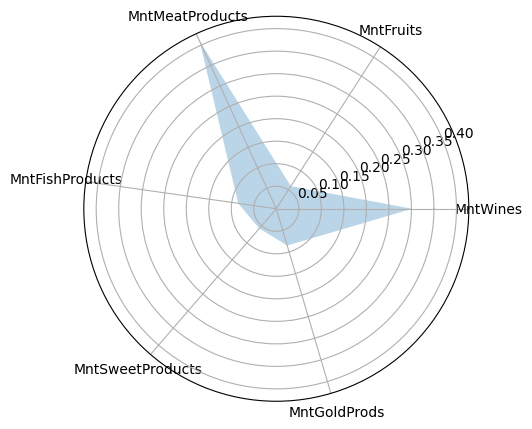

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(111, projection='polar') #figura polar, redondo, varios graficos em uma coluna
plt.fill(aux.loc[0], alpha=.3) #[0] cluster
#grafico de radas

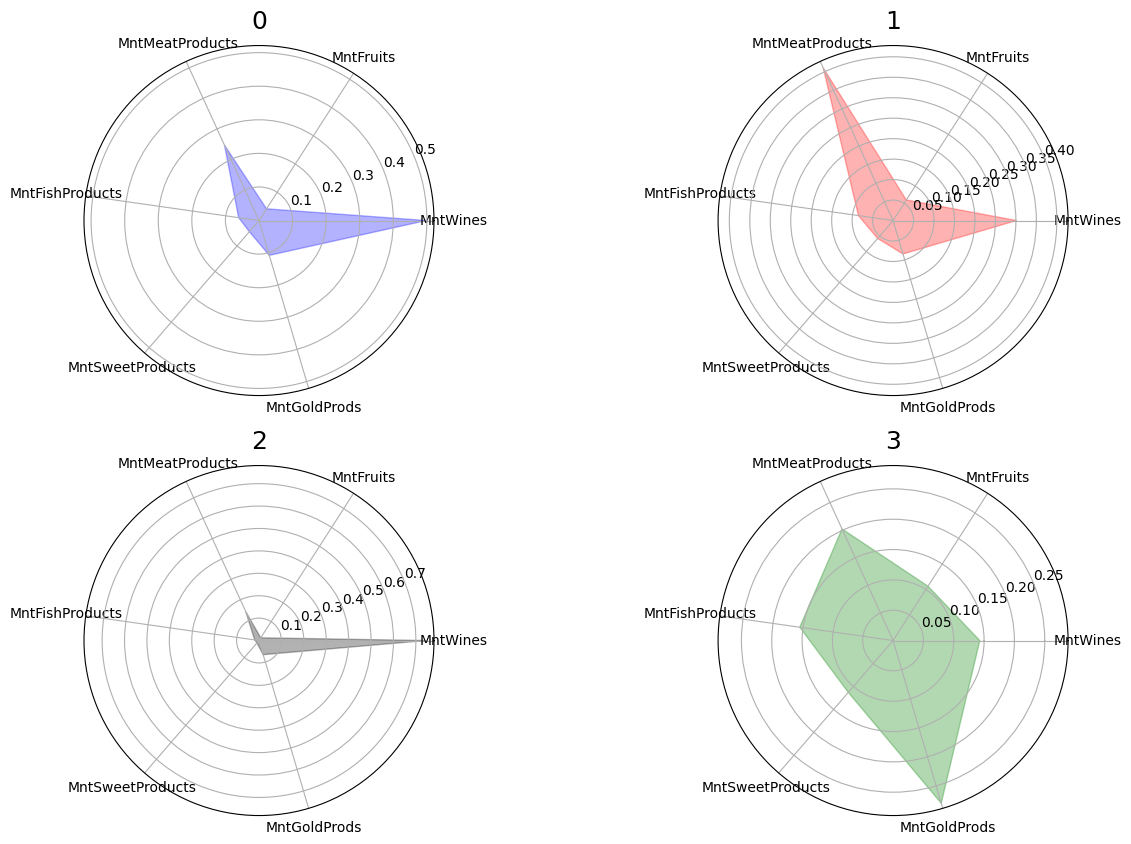

In [22]:
plt.figure(figsize=(15,2*5)) #tamanho e colocação dos cluster
colors = ['b','r','k','g'] #cor
for cl in [0,1,2,3]: #para cada indice da minha coluna faça algo
    plt.subplot(2,2,cl+1, projection='polar') #plotar
    plt.fill(aux.loc[cl], alpha=.3, color=colors[cl]) #linha do cluster, lista de cores
    plt.title(cl,fontsize=18) #tamanho da letra do título

In [21]:
df.loc[:,'cluster'] = clus
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income,cluster
0,5524,635,88,546,172,88,88,1957,58138.0,1
1,2174,11,1,6,2,1,6,1954,46344.0,0
2,4141,426,49,127,111,21,42,1965,71613.0,0
3,6182,11,4,20,10,3,5,1984,26646.0,1
4,5324,173,43,118,46,27,15,1981,58293.0,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0,0
2236,4001,406,0,30,0,0,8,1946,64014.0,2
2237,7270,908,48,217,32,12,24,1981,56981.0,2
2238,8235,428,30,214,80,30,61,1956,69245.0,0


In [23]:
df.groupby('cluster').Year_Birth.mean()
#anod e nascimento agrupando, vendo a média apos cluster

cluster
0    1967.763411
1    1970.937618
2    1965.064356
3    1973.825397
Name: Year_Birth, dtype: float64

In [24]:
df.groupby('cluster').Income.mean()
#renda

cluster
0    55844.881616
1    57671.922929
2    55677.612957
3    32449.954907
Name: Income, dtype: float64